<a href="https://colab.research.google.com/github/jsebastianquiroga/Topicos_analitica/blob/main/Notebook/Social_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Tópicos avanzados en analítica.</strong></h1> 
<h2> Para: Luis Gabriel Moreno Sandoval.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Alejandro Vivas.</br></h2>
<h2>Johan Sebastian Muñoz.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Workshop 1: Power Laws and Graph.</strong></h1> 

Hemos hablado de leyes de potencia y redes aleatorias. Una de esas leyes de potencia se produce en relación con 
la topología de las redes naturales: La mayoría de los nodos tienen pocas conexiones, y pocos nodos tienen la mayoría de las 
conexiones. Estas estructuras de red tienen importantes consecuencias en la dinámica del 
sistema asociado: Redes de transporte, redes de comunicación, redes metabólicas, 
redes epidemiológicas, redes sociales, etc. Vamos a repasar algunos conceptos relacionados.

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Analisis Lectura. </li>
<li> Redes sintéticas. </li>
<li> Redes Naturales. </li>
<li> Conclusiones.</li>
</ol>

***

# <h1><strong> 1. Analisis de Lectura: </h1></strong>

La lectura se enfoca en explicar dos tipos de Redes, las aleatorios y las de escala libre, cada una tiene diferentes condiciones y características que las hacen únicas. </br>

 


<ol>
<li> Redes Aleatorias:  Consisten en la conexión de nodos de forma aleatoria entre ellos, esto hace referencia a la no existencia de preferencia o prelación al momento de crear un nuevo enlace, lo que produce que el número de enlaces promedio entre nodos en promedio es igual, haciendo que la distribución de sus enlaces sigue la forma de una campana de Gauss. Esta misma condición particular hace que estas redes tienden a ser muy frágiles, ante posibles fallas de alguno de sus nodos, rápidamente causan una desconexión de alto impacto en la red..</li>
<li> Redes Libres de Escala: Son aquellas donde comienza a crearse un orden o peso de relevancia, ha aquellos nodos que tienen un mayor numero de enlaces asociados, creando así nodos centrales. La relevancia de estos nodos radica en la importancia que tienen para la estabilidad (logran sostenerse ante posibles caídas de nodos) e impacto dentro de la red (estos nodos son quienes logran llegar a un mayor número de nodos en comparación con los demás). Y aun teniendo estas cualidades, esta red es débil ante ataques dirigidos, donde la caída del 5 al 15 porciento de los nodos centralizadores que contenga la red, la llevara a desconectarse, un ejemplo claro de esto son los hacker o piratas informáticos que tratan de hacer caer algunos servicios, al saturar los sistemas. </li>


# <h1><strong> 2. Redes sintéticas: </h1></strong>

Se construiran dos redes, se comenzara con dos nodos, y posteriormente se conecatará aleatoriamente con alguno de los existentes. </br>

<ol>
<li> Primera red: Elección mediante una distribución uniforme entre los nodos existentes.</li>
<li> Segunda red: Con base a las conexiones de cada nodo existente, se crean nuevos nodos asignando enlaces usando el formato de Free scal </li>
<li> Comparación. </li> </ol>

## 2.1. Primera red: Elección mediante una distribución uniforme entre los nodos existentes.

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install networkx --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Se importan las Librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import networkx as nx
import collections 

import statistics
import random
from random import randint



Nodos iniciales de la red Sitética: [1, 2]
Conexiones iniciales de la red Sitética: [(1, 2)]
------------------------------------------------------


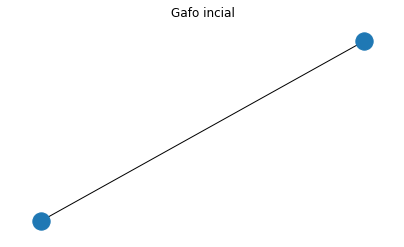

In [4]:
#Crear objeto grafo, con sus dos primeros nodos y conexiones.
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_edge(1,2)

print('Nodos iniciales de la red Sitética:', G1.nodes)
print('Conexiones iniciales de la red Sitética:', G1.edges)
print('------------------------------------------------------')
#Generacion del grafo RANDOM

plt.figure(figsize=(7,4))
plt.title('Gafo incial')

nx.draw_circular(G1)

In [5]:
!pip install --upgrade networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
  #Se define una funcion que crea una red sintetica con una distribución uniforme
  #toma como entradas la cantidad de conexiones total que se quiere para red, el tamaño de sus nodos totales y la cantidad de nodos iniciales.
  def generate_random_graph(Edges, Nodes, inicial_nodes):

      # Se crea una matriz adjacente de 0 con dimenciones N x N
      A = np.zeros((Nodes, Nodes))

      # Conexión aleatoria
      for i in range(inicial_nodes, Edges, 1):

        # Elexion de los dos nodos inciales.
        for node in range(inicial_nodes):

          ini_node=randint(0,i-1)

          if i< Nodes:
            G1.add_node(i)
            G1.add_edge(i,ini_node)
          else:
            node1=randint(0,Nodes)
            node2=randint(0,Nodes)
            G1.add_edge(node1,node2)
            
      return G1

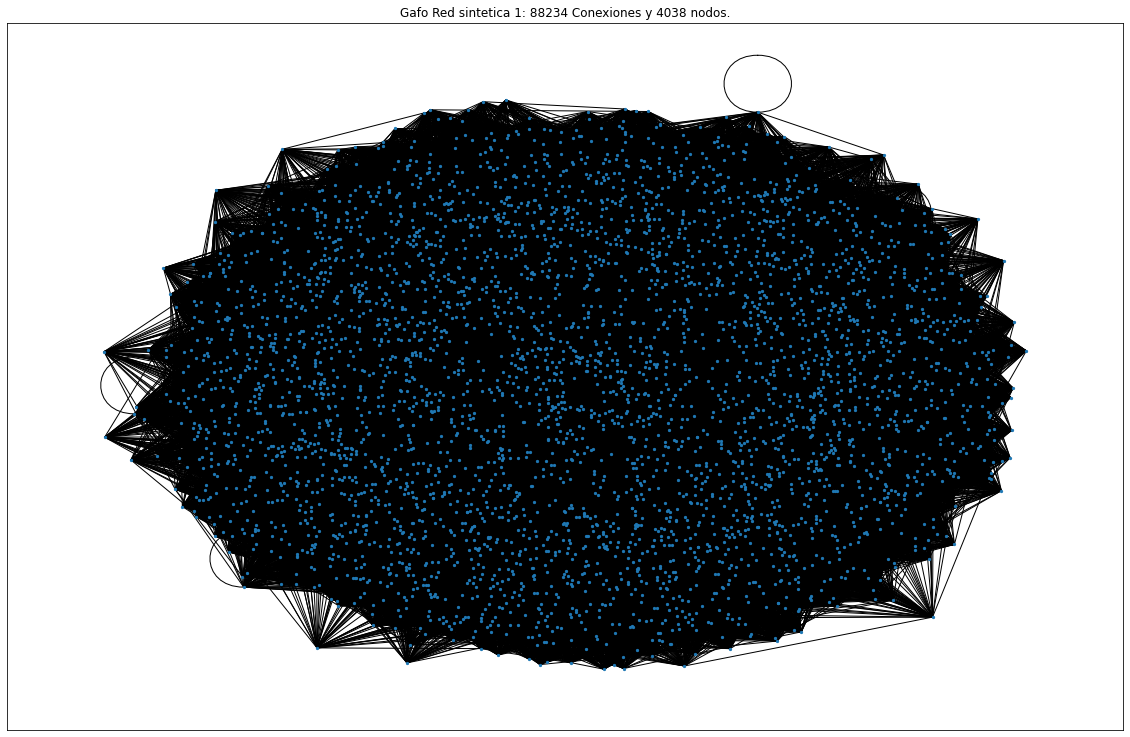

In [7]:
# Se crea un red GS1 con 88234 Conexiones y 4038 nodos.
GS1 = generate_random_graph(88234, 4038, 2)
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 1: 88234 Conexiones y 4038 nodos.')

pos = nx.spring_layout(GS1)
nx.draw_networkx_nodes(GS1,pos,node_size=5)
nx.draw_networkx_edges(GS1,pos, alpha=1)

In [8]:
print('Nodos iniciales de la red Sitética:', GS1.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', GS1.number_of_edges())
print('------------------------------------------------------')

Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 174617
------------------------------------------------------


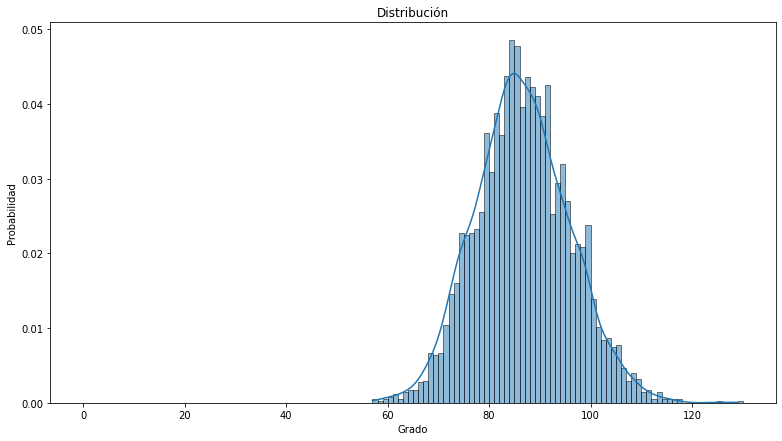

In [9]:
# Se calcula el grado de cada nodo.
degrees = dict(GS1.degree())
plt.figure(figsize=(13,7))
# histograma
sns.histplot(list(degrees.values()), bins=range(0, max(degrees.values())+2, 1), stat='density', kde=True)
plt.title("Distribución")
plt.xlabel("Grado")
plt.ylabel("Probabilidad")


#ver
plt.show()

## 2.2.Segunda red: Con base a las conexiones de cada nodo existente, se crean nuevos nodos asignando enlaces usando el formato de Free scale ##

In [10]:
#Se define una funcion que crea una red sintetica con una distribución Free Sclare
#toma como entradas la cantidad de conexiones total que se quiere para red y la cantidad de nodos
def generate_scale_free_graph(n_edges, n_nodes):
    G2 = nx.Graph()
    G2.add_node(1)
    G2.add_node(2)
    G2.add_edge(1, 2)

    # Se agrega a un nodo y conexion existente en la red.
    for i in range(3, n_nodes+1):
        # Seleccion del nodo.
        new_node = i

        # Conectar basado en la probabilidades
        total_degree = sum(dict(G2.degree()).values())
        probabilities = [degree / total_degree for degree in dict(G2.degree()).values()]
        connected_node = random.choices(list(G2.nodes()), weights=probabilities)

        # Agrega conexion y nodo
        G2.add_node(new_node)
        G2.add_edge(new_node, connected_node[0])
        
    # Sleccionamos dos nodos para crear una nuevos enlaces hasta llegar al total solicitado
    while G2.number_of_edges() < n_edges:
        total_degree = sum(dict(G2.degree()).values())
        probabilities = [degree / total_degree for degree in dict(G2.degree()).values()]
        para = random.choices(list(G2.nodes()), weights=probabilities, k=2)

        # Agrega conexion y nodo
        G2.add_edge(para[0], para[1])
        
    return G2

Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 88234
------------------------------------------------------


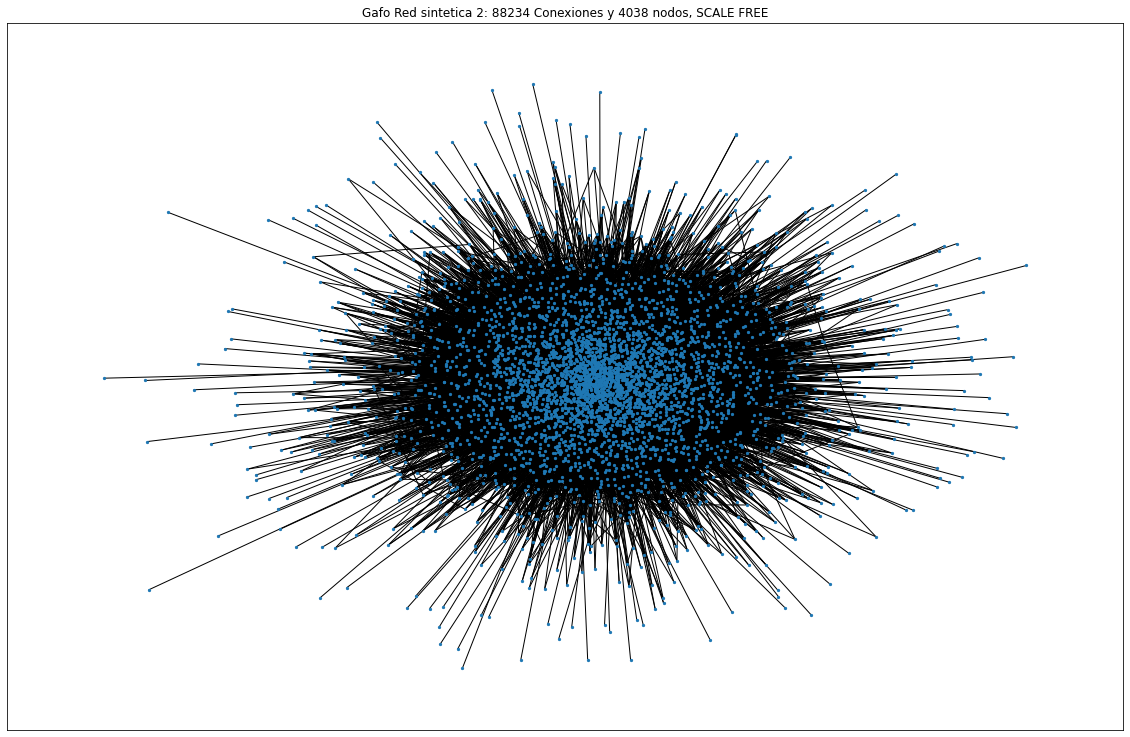

In [11]:
Gs2 = generate_scale_free_graph(n_edges=88234, n_nodes=4039)
print('Nodos iniciales de la red Sitética:', Gs2.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', Gs2.number_of_edges())
print('------------------------------------------------------')
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 2: 88234 Conexiones y 4038 nodos, SCALE FREE')

pos = nx.spring_layout(Gs2)
nx.draw_networkx_nodes(Gs2,pos,node_size=5)
nx.draw_networkx_edges(Gs2,pos, alpha=1)

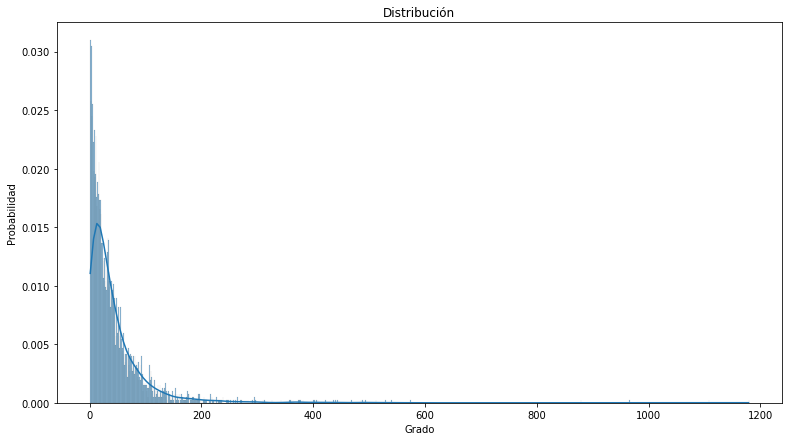

In [12]:
# Se calcula el grado de cada nodo.
degrees_2 = dict(Gs2.degree())
plt.figure(figsize=(13,7))
# histograma
sns.histplot(list(degrees_2.values()), bins=range(0, max(degrees_2.values())+2, 1), stat='density', kde=True)
plt.title("Distribución")
plt.xlabel("Grado")
plt.ylabel("Probabilidad")


#ver
plt.show()

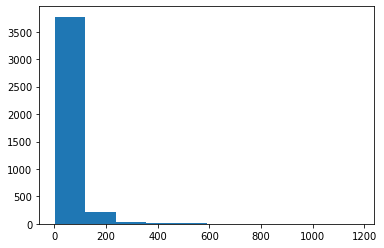

In [13]:

#DEFINICION GRAFICO DE DISTRIBUCION
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(Gs2)

## 2.3.Comparacion: ##


Llevando la teoria de la lectura a la practica, iniciamos con la creacion de la red aleatoria (2.1.), donde buscamos una funcion que cumplira la condicion de escoger un nodo de manera uniforme, al finalizar vemos como se cumple que para una red aleatoria su distribucion de grado tiene una forma de campana. Ademas se puede ingerir que la mayoria de nodos estan entre 70 y 100 enlaces asociados.

La red de escala libre requiere tambien de una eleccion aleatoria de a cuál nodo se asignara el nuevo nodo en la red, para esto calculamos unos pesos en cada iteracion. Estos pesos son la cantidad de enlaces que tiene cada nodo en esa iteracion, dividio el total de enlaces en la red para esa iteracion. Con esto se logro dar mayor peso a los nodos que tenian mayor numero de enlaces. Con esta informacion pasamos a seleccionar el nodo usando la funcion de random.choices, debido a que nos permitia agregar unos pesos a cada nodo. Y finalmente logramos comparar que la grafica de distribucion para la red libre de escalas, cumple con la teoria de que existen hub's o nodos centralizados donde existe el mayor numero de enlaces.



. </br>


# <h1><strong> 3. Redes Naturales (Facebook): </h1></strong>

Con un archivo que relaciona los links de 4039 estudiantes en algun departamento de una universidad.

Se computara la distribución de los grados. </br>

In [14]:
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [15]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

txt = '1iqJCWz_qyY4zEgNXlquXDOoRPG0trKTC' 


download = drive.CreateFile({'id': txt}) 
download.GetContentFile('Workshop 1_facebookNetwork.txt')



In [16]:
#LECTURA NODOS Y EDGES FACEBOOK
Gfb = pd.read_csv(r'Workshop 1_facebookNetwork.txt',sep=' ')
Gfb.head()

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 88233
------------------------------------------------------


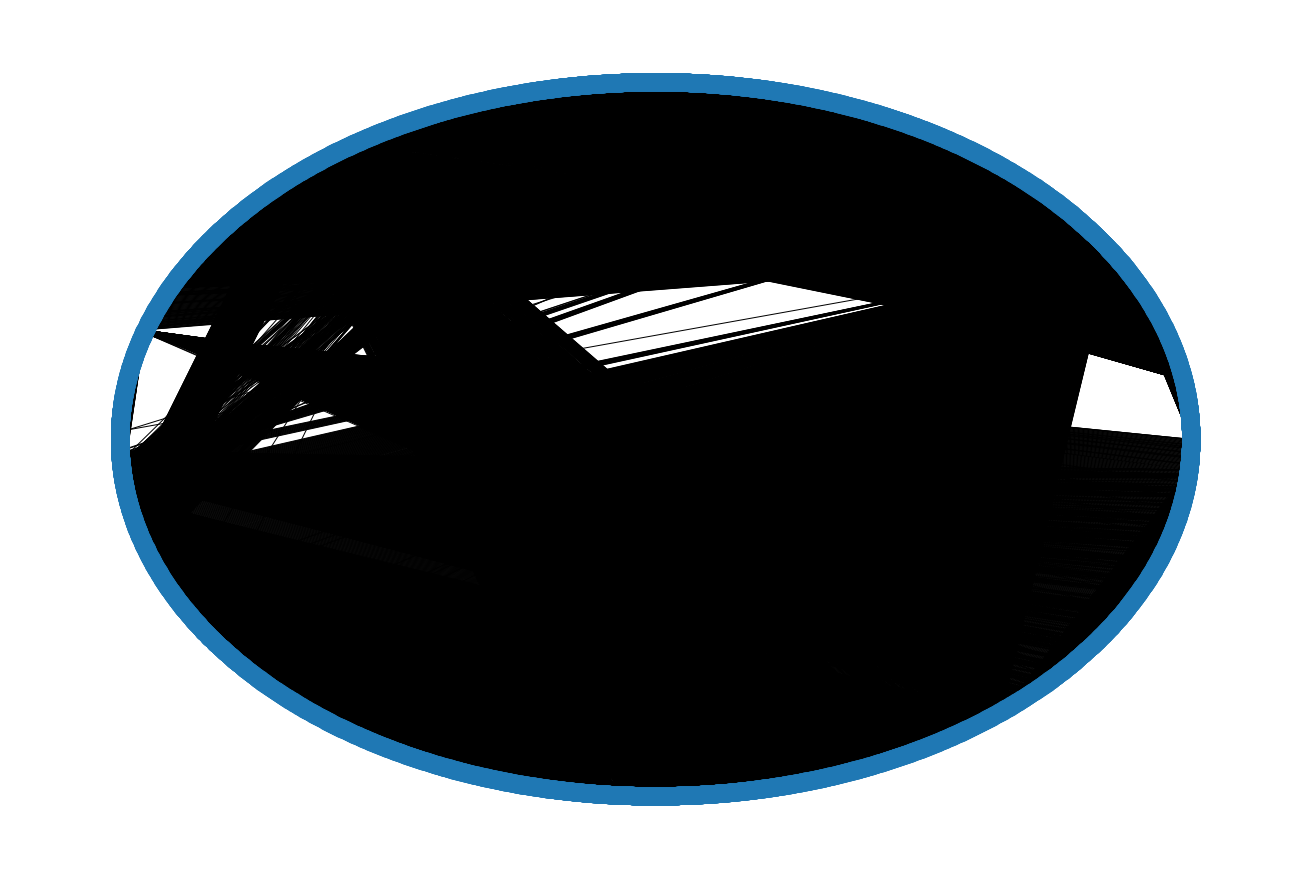

In [17]:
#GENERACION GRAFO FACEBOOK
H = nx.Graph()
fb_list = Gfb.values.tolist()
H.add_edges_from(fb_list)
print('Nodos iniciales de la red Sitética:', H.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', H.number_of_edges())
print('------------------------------------------------------')
plt.figure(figsize=(18,12))
nx.draw_circular(H)

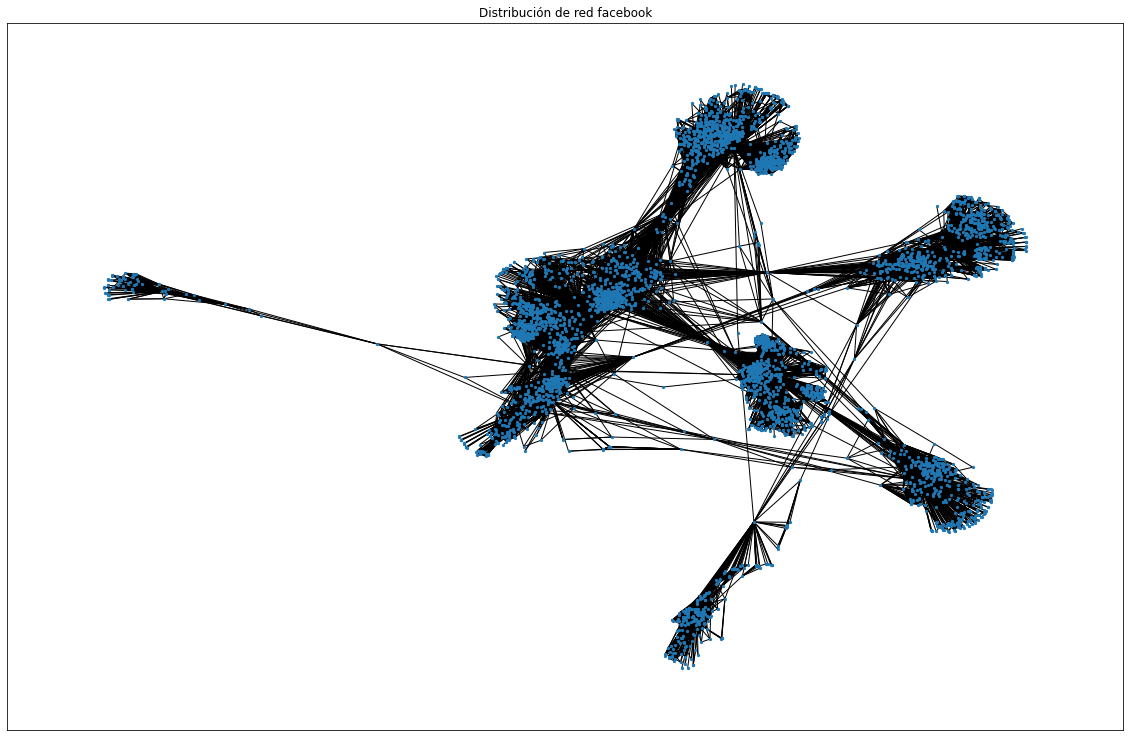

In [20]:
#DISTRIBUCION GRAFO FACEBOOK
# plot_degree_dist(H, 'Distribución de red facebook')

plt.figure(figsize=(20,13))
plt.title('Distribución de red facebook')

pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,node_size=5)
nx.draw_networkx_edges(H,pos, alpha=1)

# <h1><strong> 4. Conclusiones: </h1></strong>

<ol>
<li> Las redes aleatorias tienen homogeneidad en la cantidad de enlaces que cada nodo tiene.</li>
<li> Existen nodos centralizados (hub's) dentro de las redes de escala libre.</li>
<li> Las redes libres de escala, estan presente en la mayoria de creaciones o sistemas basados en la logica social huamana, donde las primeras cosas, personas, creencias, son aquellas donde existen mas conexiones, el ejemplo de la vida real es el resultado del punto 3, donde se ve claramente que en Facebook existen algunas personas que son puntos centrales de relaciones, del total de personas en la muestra. </li>


In [21]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [23]:
!jupyter nbconvert --to latex  Social_Network_1.ipynb
# jupyter nbconvert --to latex mynotebook.ipynb

[NbConvertApp] WARNING | pattern 'Social_Network_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

In [ ]:
from google.colab import drive
drive.mount('/content/drive')